This notebook summarizes the major steps implemented in this project.  For a more detailed look please view the other notebooks in this repository.  

I have two goals in this project.  The first was to use NLP to predict a good or bad comment on reddit. The second goal is to see whether I can use Latent Dirichlet Allocation topic modelling to create features that will enhance an NLP model.

Reddit user u'Stuck in the matrix has archived every reddit comment beginning in 2015 and made them publicly available.  Alternatively, one could use the reddit API and collect data but there are limitations on how much you can collect at a time.  There is even a python specific wrapper created for the reddit API.  PRAW is a well known tool used to access reddit.

I downloaded one full month of reddit data (5/2017) from https://files.pushshift.io/reddit/. One month of reddit comments should provide sufficient data for this project. 


I want to open one record and load it just to see what the JSON and loaded version looks like

How many total records are in the file we downloaded?

In [6]:
#total records in 5/2017 comment file
archive = '/home/augustine/Documents/reddit_project/RC_2017-05.bz2'
with bz2.open(archive,'rt') as f:
    for count, record in enumerate(f):
        pass
    print(count)

79810359


79.8M comments! That seems like a good amount of data to work with.

Let's take a look at some of the subreddits and their number of comments.


This month the most active subreddits were AskReddit with 5 million comments and politics with 2 million comments.

Now I'm hoping this is working. Let's see if we can specify a subreddit and look at one record. 

The comments in the file are stored in JSON format.  To process the file, I will use a 2d array. First I initialize an empty list, open the file and initialize another empty list.  As I read each line, if the comment is from the soccer subreddit (or subreddit of your choice) then unpack the JSON string into a list. These lists are appended to each other as well as the first list.  loop through each  I am going to loop through and
To arrange the data in the format I want, I created empty arrays for each field in the JSON file and then loaded the file into a 2D-Array.

I ran for one subreddit (I picked soccer because I enjoy soccer) but we can load all of the subreddits into a list
and then loop through the list to load all subreddits into a dataframe.

In [21]:
#step 1
pd.set_option('display.max_columns',None)#b/c i want to see all columns
import pandas as pd
import json
import bz2 

#archive = '/home/augustine/Documents/reddit_project/RC_2017-05.bz2'
archive= 'C:\\users\Augustine\Documents\\reddit\RC_2017-05.bz2'
line_all= []
with bz2.open(archive,'rt') as f:
    my_row= []
    for comment in f:
        if json.loads(comment)['subreddit']=='soccer':
            comment= json.loads(comment) 
            my_row.append(comment)
    line_all.append(my_row)


Now I'm going to create lists for each field in the JSON string.  In the next step I will create a dataframe from the lists.

In [24]:
#step 2
author=[]
author_flair_css_class= []
author_flair_text= []
body= []
can_gild= []
controversiality= []
created_utc= []
distinguished= []
edited= []
gilded= []
id= []
link_id= []
parent_id= []
retrieved_on= []
score= []
stickied= []
subreddit= []
subreddit_id= []


for i in range(0, len(line_all[0])):
    author.append(line_all[0][i]['author'])
    author_flair_css_class.append(line_all[0][i]['author_flair_css_class'])
    author_flair_text.append(line_all[0][i]['author_flair_text'])
    body.append(line_all[0][i]['body'])
    can_gild.append(line_all[0][i]['can_gild'])
    controversiality.append(line_all[0][i]['controversiality'])
    created_utc.append(line_all[0][i]['created_utc'])
    distinguished.append(line_all[0][i]['distinguished'])
    edited.append(line_all[0][i]['edited'])
    gilded.append(line_all[0][i]['gilded'])
    id.append(line_all[0][i]['id'])
    link_id.append(line_all[0][i]['link_id'])
    parent_id.append(line_all[0][i]['parent_id'])
    retrieved_on.append(line_all[0][i]['retrieved_on'])
    score.append(line_all[0][i]['score'])
    stickied.append(line_all[0][i]['stickied'])
    subreddit.append(line_all[0][i]['subreddit'])
    subreddit_id.append(line_all[0][i]['subreddit_id'])

    

I want to check the lenght of my subreddit list

In [25]:
#step 3 check the length matches earlier
#line_all[1][]['line']['body']
len(line_all[0])

572163

Finally, load the lists as a dataframe. This is really only possible since I already know the fields in the file.

In [69]:
#step 4
import numpy as np
from pandas import Series, DataFrame
import pandas as pd

subr_df= DataFrame({'author':author,
                   'author_flair_css_class':author_flair_css_class,
                   'author_flair_text':author_flair_text,
                   'body':body,
                   'can_gild':can_gild,
                   'controversiality':controversiality,
                   'created_utc':created_utc,
                   'distinguished':distinguished,
                   'edited':edited,
                   'gilded':gilded,
                   'id':id,
                   'link_id':link_id,
                   'parent_id':parent_id,
                   'retrieved_on':retrieved_on,
                   'score':score,
                   'stickied':stickied,
                   'subreddit':subreddit,
                   'subreddit_id':subreddit_id})

subr_df= subr_df[['author', 'author_flair_css_class','author_flair_text','body','can_gild','controversiality',
                   'created_utc','distinguished','edited','gilded','id','link_id','parent_id','retrieved_on',
                   'score','stickied','subreddit','subreddit_id']]

In [48]:
subr_df['body'].describe()

count        572163
unique       519994
top       [deleted]
freq          31760
Name: body, dtype: object

In [46]:
subr_df['author'].describe()

count        572163
unique        44846
top       [deleted]
freq          37745
Name: author, dtype: object

In [47]:
subr_df['score'].describe()

count    572163.000000
mean         13.210465
std          69.942649
min        -610.000000
25%           1.000000
50%           2.000000
75%           8.000000
max       10818.000000
Name: score, dtype: float64

In [31]:
subr_df['author'].notnull().sum()

572163

The reddit data uses a created_utc timestamp for each comments. One thing I'll do for easier processing and a more intuitve view is convert the field created_utc to a python datetime datatype.

In [99]:
from datetime import datetime
subr_df['created_datetime'] = subr_df.created_utc.apply(datetime.utcfromtimestamp)
subr_df['created_year'] = subr_df.created_datetime.dt.year
subr_df['created_month'] = subr_df.created_datetime.dt.month
subr_df['created_day'] = subr_df.created_datetime.dt.day
subr_df['created_hour'] = subr_df.created_datetime.dt.hour


In [100]:
subr_df.head()

,author,author_flair_css_class,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,...,score,stickied,subreddit,subreddit_id,created_datetime,hour,created_hour,created_day,created_year,created_month
0,iEatPorcupines,None,None,"After seeing [this,](https://my.mixtape.moe/ro...",True,0,1493596800,None,False,0,...,2,False,soccer,t5_2qi58,2017-05-01 00:00:00,0,0,1,2017,5
1,Thesolly180,s1 3 team-3 country-eng,Liverpool,"Didn't say I'd never heard of it, where did I ...",True,0,1493596818,None,False,0,...,0,False,soccer,t5_2qi58,2017-05-01 00:00:18,0,0,1,2017,5
2,ntdxc1878,s1 15 team-15 country-eng,Everton,What's the context?,True,0,1493596822,None,False,0,...,2,False,soccer,t5_2qi58,2017-05-01 00:00:22,0,0,1,2017,5
3,iEatPorcupines,None,None,Just show him [this.](https://my.mixtape.moe/r...,True,0,1493596823,None,False,0,...,1,False,soccer,t5_2qi58,2017-05-01 00:00:23,0,0,1,2017,5
4,[deleted],None,None,[deleted],True,0,1493596826,None,False,0,...,-32,False,soccer,t5_2qi58,2017-05-01 00:00:26,0,0,1,2017,5


In [101]:
#count comments during the month by time
time_counts=subr_df.created_datetime.value_counts()
time_countsDf=time_counts.to_frame()
#time_countsDf.rename(columns=)
time_countsDf.rename(columns={'time':'comments'},inplace=True)

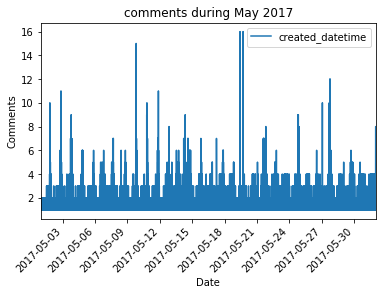

In [102]:
#now graph the number of comments during the month by time

#plot comments by hour of the day
import matplotlib.pyplot as plt
%matplotlib inline

time_countsDf.plot(kind='line',title= 'comments during May 2017')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Comments')
plt.show()


Inspecting some of the fields, it looks like some comments have been deleted. I'll end up dropping those comments from the data set.

In [91]:
#create an 'hour' feature so we can graph posts by hour of day
subr_df['hour']=subr_df.created_datetime.dt.hour

Let's look at comments by day/ time in a couple of different ways.

Let's look at the number of comments per day of the month.
The largest comment count was on the 21st of May.  May 21st was 'Super Sunday'(the last day of the season) in the Barclay's Premier League and should explain the high comment count. 

In [103]:
day_counts=subr_df.created_day.value_counts().sort_index()
day_countsDf= day_counts.to_frame()
day_countsDf.rename(columns={'time':'comments'},inplace=True)

In [ ]:

import matplotlib.pyplot as plt
%matplotlib inline

day_countsDf.plot(kind='line',title= 'comments by day during May 2017')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Comments')
plt.show()


Next look at hour of the day.  Earlier we created an hour feature based on our 'created_datetime' field.

In [107]:
#count comments by hour(1-24) of the day
hour_counts=subr_df.hour.value_counts().sort_index()
unique_hours=subr_df.hour.unique()
hour_countsDf= hour_counts.to_frame()
#unique_hoursDf= unique_hours.to_frame()
hour_countsDf.rename(columns={'hour':'comments'},inplace=True)
#print(hour_counts)
#print(unique_hours)

Based on the graph below, comment volume throughout the month peaks at hour 20 or 8 pm.  

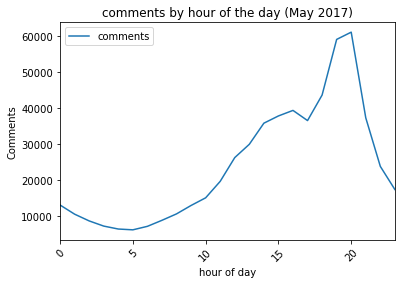

In [109]:
#plot comments by hour of the day
import matplotlib.pyplot as plt
%matplotlib inline

hour_countsDf.plot(kind='line',title= 'comments by hour of the day (May 2017)')
plt.xticks(rotation=45)
plt.xlabel('hour of day')
plt.ylabel('Comments')
plt.show()


An important step is determining which comments to use.  Often sub-comments can turn into conversations between two individuals and may not have any upvotes.

Building a commnet tree requires parsing the parent_id field and matching ID's until reaching a parent_id beginning with 't3'.

In this project I will use parent level comments.  Parent level comments have t3 in the 'parent_id' field.
I'm going to use a simple regular expression to subset the dataframe so I just have parent level comments.


In [138]:
import re 
par_subr_df=subr_df[subr_df.parent_id.str.contains('t3_',regex=True)]


As we saw earlier, some comments have been deleted and I also want to drop these.

In [152]:
#remove obeservations where the body/comment was deleted
del_par_subr_df= par_subr_df.loc[(par_subr_df['body']!='[deleted]')]

Since

In [154]:
del_par_subr_df['score'].describe()

count    155254.000000
mean         19.221482
std         110.013798
min        -220.000000
25%           1.000000
50%           2.000000
75%           8.000000
max       10818.000000
Name: score, dtype: float64

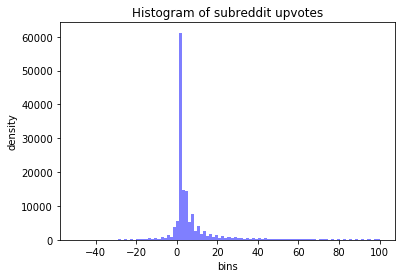

In [301]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
 
x = del_par_subr_df['score']
num_bins = 100
n, bins, patches = plt.hist(x,num_bins, range=[-50,100], facecolor='blue', alpha=0.5)
plt.title('Histogram of subreddit upvotes')
plt.ylabel('density')
plt.xlabel('bins')
plt.show()

In [ ]:
import numpy as np 
del_par_subr_df.target=np.where(del_par_subr_df.score<2,0,1)


Before cleaning and applying any machine learning algorithm I'm going to split the data 80/20 into a training and test set.  This way 80% of the data will be used to train a model and 20% of the data the model has never seen will be used to evaluate performance of the model.

In [186]:
#split data set into train and test 
from sklearn.model_selection import train_test_split 

#split dataStg into train/ test
train, test= train_test_split(del_par_subr_df,test_size=.2)

# recreate index in test and train sets so we can run through the text processing function
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)


There are several methods of cleaning a corpus.  In the step below, I define a function to clean the text one document at a time. Text cleaning includes removing html tags, web links, converting text to lower case, removing numbers, removing stop words, and lemmatizing the text. 

In [225]:
#clean text
#define function to process raw text one record at a time
from bs4 import BeautifulSoup
import re 
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer= WordNetLemmatizer()
from nltk.stem import PorterStemmer 
ps= PorterStemmer()
from nltk.corpus import stopwords 
from nltk import clean_html

def processText(raw):
#remove tags
#    text= clean_html(raw)
    text = BeautifulSoup(raw,'lxml')

#remove numbers so we only have text    
    letters= re.sub("[^a-zA-Z]"," ",text.get_text())
#remove url patterns    
    url_pattern = r'((http|ftp|https):\/\/)?[\w\-_]+(\.[\w\-_]+)+([\w\-\.,@?^=%&amp;:/~\+#]*[\w\-\@?^=%&amp;/~\+#])?'
    lettersOnly = re.sub(url_pattern, ' ', letters)
#change everything to lower case and split 
    lowers= lettersOnly.lower()
#stem lower case letters
    lems= wordnet_lemmatizer.lemmatize(lowers).split()
#remove common words using nltk dictionary
    stopWords= set(stopwords.words('english'))
    procdText= [j for j in lems if not j in stopWords]
#mash everything back together     
    return procdText
    #return( " ".join(procdText))

In [ ]:
#loop through train data and process text
#get number of rows
numRows= train["body"].size
print(numRows)
#init empty list
cleanText= []
#now loop through text rows
for i in range(0,numRows):
    if ((i+1)%50000 == 0 ):
        print ("processing %d of %d\n" %(i+1,numRows))
    cleanText.append(processText(train["body"][i]))

In [ ]:
#Do the same processing loop through text for the test data
numRows= test["body"].size
print(numRows)
#init empty list
testText= []
#now loop through text rows
for i in range(0,numRows):
    if ((i+1)%50000 == 0 ):
        print ("processing %d of %d\n" %(i+1,numRows))
    testText.append(processText(test["body"][i]))

Prior to running an LDA model, I set up a log the writes out to the screen.  Gensim doesn't automatically print log messages, so running a model over large corpus there may not be any indication of how far the model has progressed. 

In [237]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [ ]:
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
dictionary = corpora.Dictionary(cleanText)
dictionary.filter_extremes(no_below=10, no_above=0.4)
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in cleanText]

We can print out topics of the LDA model learned in the last step to get more understanding of each topic.  At this point some domain knowledge is helpful to understand how well these topics are fitting.

In [246]:
def explore_topic(topic_number, topn=25):
    """
    accept a user-supplied topic number and
    print out a formatted list of the top terms
    """
        
    print (u'{:20} {}'.format(u'term', u'frequency') + u'\n')

    for term, frequency in ldamodel.show_topic(topic_number, topn=25):
        print (u'{:20} {:.3f}'.format(term, round(frequency, 3)))

In [ ]:
explore_topic(0, topn=25)

term                 frequency

fuck                 0.034
r                    0.025
soccer               0.019
please               0.017
post                 0.017
least                0.016
removed              0.014
must                 0.012
old                  0.008
legend               0.007
yellow               0.007
contact              0.007
action               0.007
yes                  0.007
questions            0.006
one                  0.006
automatically        0.006
want                 0.006
thread               0.006
subreddit            0.006
performed            0.006
jesus                0.006
use                  0.006
bot                  0.006
message              0.006

In [ ]:
explore_topic(1, topn=25)

term                 frequency

like                 0.011
season               0.008
would                0.007
get                  0.007
game                 0.007
good                 0.007
one                  0.007
team                 0.007
league               0.006
really               0.005
think                0.005
players              0.005
play                 0.005
goal                 0.005
even                 0.005
see                  0.005
time                 0.005
going                0.004
great                0.004
well                 0.004
player               0.004
fucking              0.004
football             0.004
win                  0.004
shit                 0.004

In [ ]:
explore_topic(2,topn=25)

term                 frequency

com                  0.042
https                0.036
streamable           0.020
www                  0.015
mirror               0.012
u                    0.011
http                 0.011
bot                  0.010
message              0.009
reddit               0.008
v                    0.008
possible             0.008
leave                0.007
watch                0.007
youtube              0.007
e                    0.006
holy                 0.006
feedback             0.006
b                    0.005
imgur                0.005
n                    0.005
vs                   0.005
subject              0.005
pm                   0.004
compose              0.004

Some of these topics have a very distinct feel about them, but a lot of them seem to drift all over the place without a very consistent theme.

The graph below uses the pyLDAvis library. 
The three topics in the corpus appear distinct from each other.  
After a few passes I reduced the number of topics to 3.  Adding extra topics beyond 3 appeared similar and overlapped each other.  

The circles in the left panel are graph of distance between topics. Circles close together represent similar topics.
Circles further apart represent dissimilar topics.  The size of circles is related to the frequency of topics in the corpus.

In [261]:
import pyLDAvis
import pyLDAvis.gensim

LDAvis_prepared = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix,dictionary)

In [262]:
pyLDAvis.display(LDAvis_prepared)

In [6]:
from IPython.core.display import display, HTML
display(HTML('vis.html'))

I want to make sure that I extract the correct number of words from each topic.  The show_topics() attribute includes contributions to topic probability and I want to enusre a significant amount of the topic probabiliy is represented by the words I extract.

Based on the graphs below, around 350 words should be able to capture all of the important words.

The first step is extraciting the full set of topic contributions. 

In [ ]:
del_par_subr_df= pd.read_pickle('C:\\users\\Augustine\\documents\\reddit\\subr_soccer_201705.pkl')

In [ ]:
full_topics= ldamodel.show_topics(num_topics=3,num_words=len(dictionary),log=False,formatted=True)

topic1_full_list=parse_numbers(full_topics[0][1]).split(',')[:-1]
topic2_full_list=parse_numbers(full_topics[1][1]).split(',')[:-1]
topic3_full_list=parse_numbers(full_topics[2][1]).split(',')[:-1]

topic1_full_list= [float(i) for i in topic1_full_list]
topic2_full_list= [float(i) for i in topic2_full_list]
topic3_full_list= [float(i) for i in topic3_full_list]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
sort_doc=np.sort(topic1_full_list)[::-1]

cum_doc=np.cumsum(sort_doc)
count=len(cum_doc)
list_count= range(count)
#doc_range=np.array(range(doc_freq))

plt.plot(list_count,cum_doc, c='blue')
plt.xticks(np.arange(0,350,50))
plt.xlabel('terms in topic')
plt.ylabel('cumulative probability contribution')
plt.xlim(0,350)
plt.title('cumulative probability by terms in Topic 1')


Next are the topics and probabilities of each word in the topic. The show_topics() method in the GenSim library returns terms and probability for each topic. To print out all words in each topic, you could specify num_words= len(dictionary).


In [ ]:
topic_eqs=ldamodel.show_topics(num_topics=3,num_words=100,log=False,formatted=True)

I defined two funcions to parse the output from show_topics.  This will allow me to convert the output to a list of either words or the topic contributions.

In [ ]:
def parse_words(doc):
    strip_numbers= re.sub("\\d+","",doc)
    strip_pattern1= re.sub("(\\s\\+\\s)(\\.\\*)",",",strip_numbers)
    strip_pattern2= strip_pattern1.replace('"','')
    words=re.sub("^(\\.\\*)","",strip_pattern2)
    return words

In [ ]:
def parse_numbers(doc):
    strip_chars= re.sub("[a-zA-Z]","",doc)
    strip_pattern1= re.sub("(\\s\\+\\s)","",strip_chars)
    strip_pattern2= re.sub("(\\*)","",strip_pattern1)
    strip_pattern3=strip_pattern2.replace("'",'')
    numbers= strip_pattern3.replace('""',',')
    return numbers

In [ ]:
words1=parse_words(topic_eqs[0][1]).split(',')
probs1=parse_numbers(topic_eqs[0][1]).split(',')[:-1]

words2=parse_words(topic_eqs[1][1]).split(',')
probs2=parse_numbers(topic_eqs[1][1]).split(',')[:-1]

words3=parse_words(topic_eqs[2][1]).split(',')
probs3=parse_numbers(topic_eqs[2][1]).split(',')[:-1]

After parsing the strings I have lists of an 'object' datatype so I need to convert the probability lists into floats.

In [ ]:
probs1= [float(i) for i in probs1]
probs2= [float(i) for i in probs2]
probs3= [float(i) for i in probs3]

In [ ]:
words_all=[]
words_all.extend(words1)
words_all.extend(words2)
words_all.extend(words3)

I want to create new lists for the most likely topics for each document.  First I'll use get_document_topics method from the GenSim library.
This method returns a list.  Then, to find what topic each document belongs to, I'll iterate through the list and select the largest probability and its topic id (0-2 since there are 3 topics).

Then I loop through the output to identify the topic of each document.  The correct topic will have the highest probability. 

In [ ]:
full_doc_topics = ldamodel.get_document_topics(doc_term_matrix, per_word_topics=True)

max_array=[]
maxTopic= 0
max_probs= []
topic_ids=[]

for doc_topics, word_topics, phi_values in full_doc_topics:
    maxProb= 0
    for sub_array in doc_topics:
        if sub_array[1]>maxProb:
            maxProb= sub_array[1]
            maxTopic= sub_array[0]
            
    max_probs.append(maxProb)
    topic_ids.append(maxTopic)


The next step is combining the two steps above.  I need to attach the correct term feature weights to the each document based on the documents topic.

In [ ]:
topics_cont=[]
counter=0

for i in topic_ids:
    temp=[]
    if i==0:
        temp.extend([i])
        temp.extend(topic1_wts)
    if i==1:
        temp.extend([i])
        temp.extend(topic2_wts)
    if i==2:
        temp.extend([i])
        temp.extend(topic3_wts)
    topics_cont.append(temp)
    counter+1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()
clf.fit(x_train,y_train)
training_accuracy = clf.score(x_train, y_train)
#test_accuracy = clf.score(Xtest, ytest)
print(training_accuracy)
#print(test_accuracy)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(x_train, y_train)
# Print the accuracy from the testing data.
#print(accuracy_score(clf.predict(x_test), y_test))
print(accuracy_score(clf.predict(x_train), y_train))